In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, mean_squared_error
from sklearn.feature_selection import RFE

In [3]:
df = pd.read_csv('walmart_stock_prices.csv')
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0
5,1972-09-01 00:00:00-04:00,0.011330,0.011374,0.011330,0.011374,768000,0.0,0.0
6,1972-09-05 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,1689600,0.0,0.0
7,1972-09-06 00:00:00-04:00,0.011374,0.011374,0.011374,0.011374,768000,0.0,0.0
8,1972-09-07 00:00:00-04:00,0.011374,0.011374,0.011330,0.011330,3532800,0.0,0.0
9,1972-09-08 00:00:00-04:00,0.011286,0.011286,0.011242,0.011242,1996800,0.0,0.0


In [4]:
originalData = df.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          13233 non-null  object 
 1   Open          13233 non-null  float64
 2   High          13233 non-null  float64
 3   Low           13233 non-null  float64
 4   Close         13233 non-null  float64
 5   Volume        13233 non-null  int64  
 6   Dividends     13233 non-null  float64
 7   Stock Splits  13233 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 827.2+ KB


In [6]:
round(df.isna().sum()/len(df)*100,2)

Date            0.0
Open            0.0
High            0.0
Low             0.0
Close           0.0
Volume          0.0
Dividends       0.0
Stock Splits    0.0
dtype: float64

In [9]:
df.drop_duplicates()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0
...,...,...,...,...,...,...,...,...
13228,2025-02-14 00:00:00-05:00,105.300003,105.300003,103.599998,104.040001,14109500,0.0,0.0
13229,2025-02-18 00:00:00-05:00,103.720001,103.989998,102.510002,103.779999,18247300,0.0,0.0
13230,2025-02-19 00:00:00-05:00,103.849998,104.199997,102.550003,104.000000,18508000,0.0,0.0
13231,2025-02-20 00:00:00-05:00,98.779999,100.120003,96.680000,97.209999,55450900,0.0,0.0


In [18]:
df = df.sort_values('Date').reset_index(drop=True)

In [19]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1972-08-25 00:00:00-04:00,0.011463,0.011683,0.011463,0.011639,7526400,0.0,0.0
1,1972-08-28 00:00:00-04:00,0.011639,0.011727,0.011595,0.011595,2918400,0.0,0.0
2,1972-08-29 00:00:00-04:00,0.011551,0.011551,0.011463,0.011463,5836800,0.0,0.0
3,1972-08-30 00:00:00-04:00,0.011463,0.011463,0.011374,0.011463,1228800,0.0,0.0
4,1972-08-31 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,2611200,0.0,0.0
5,1972-09-01 00:00:00-04:00,0.011330,0.011374,0.011330,0.011374,768000,0.0,0.0
6,1972-09-05 00:00:00-04:00,0.011374,0.011374,0.011286,0.011286,1689600,0.0,0.0
7,1972-09-06 00:00:00-04:00,0.011374,0.011374,0.011374,0.011374,768000,0.0,0.0
8,1972-09-07 00:00:00-04:00,0.011374,0.011374,0.011330,0.011330,3532800,0.0,0.0
9,1972-09-08 00:00:00-04:00,0.011286,0.011286,0.011242,0.011242,1996800,0.0,0.0


In [22]:
numericalData = df.select_dtypes(include='number')
numCol = numericalData.columns

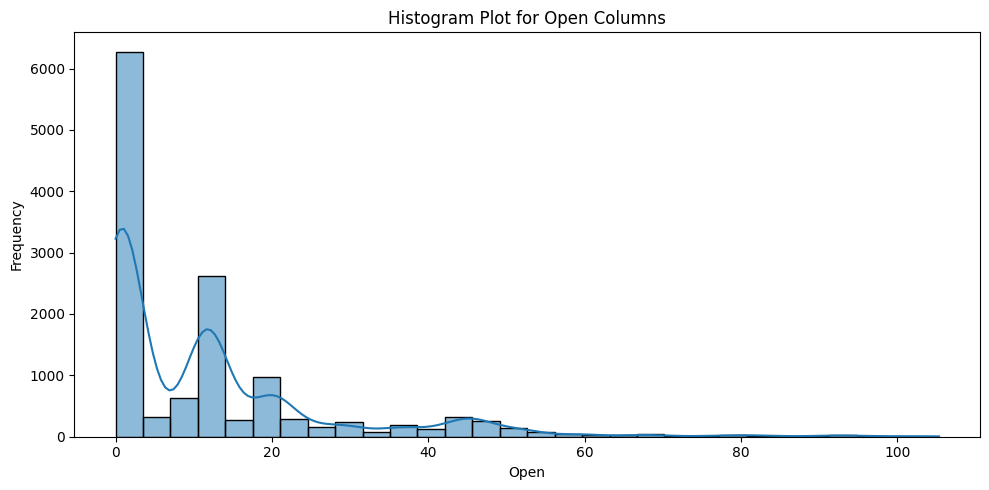

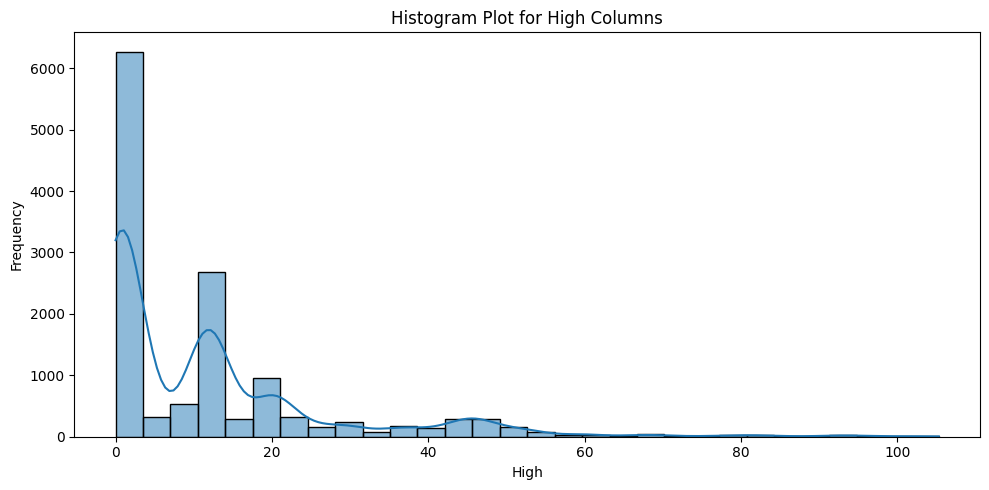

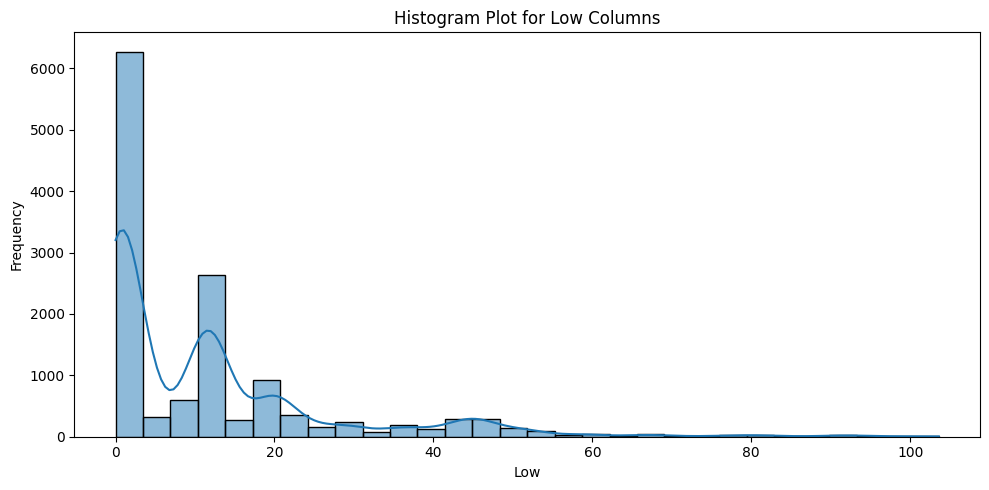

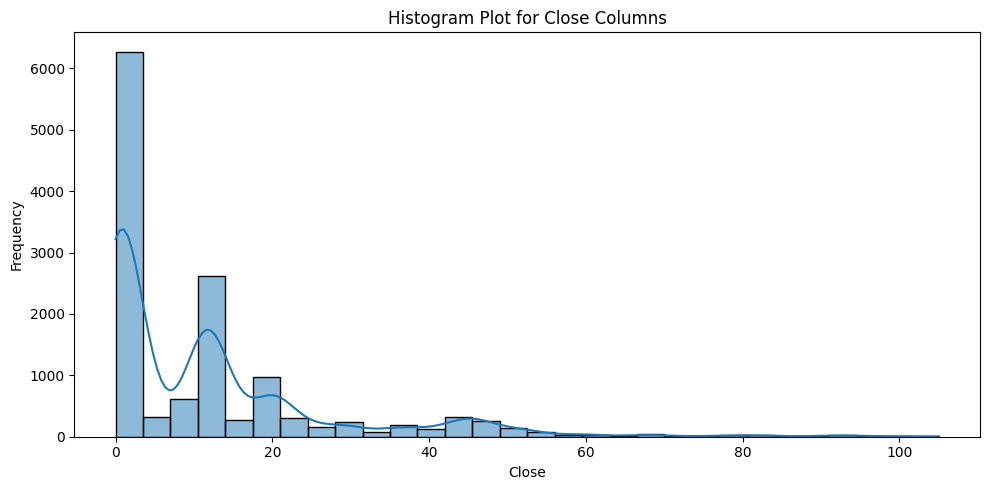

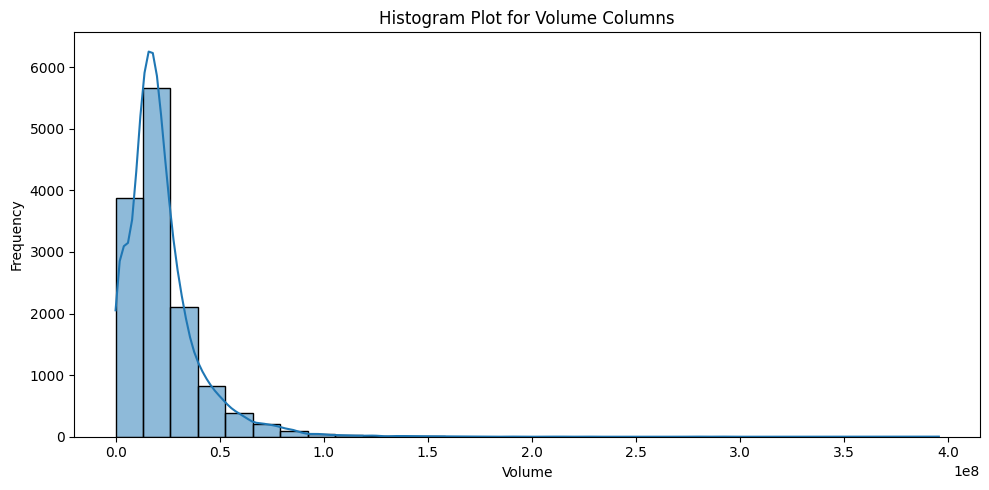

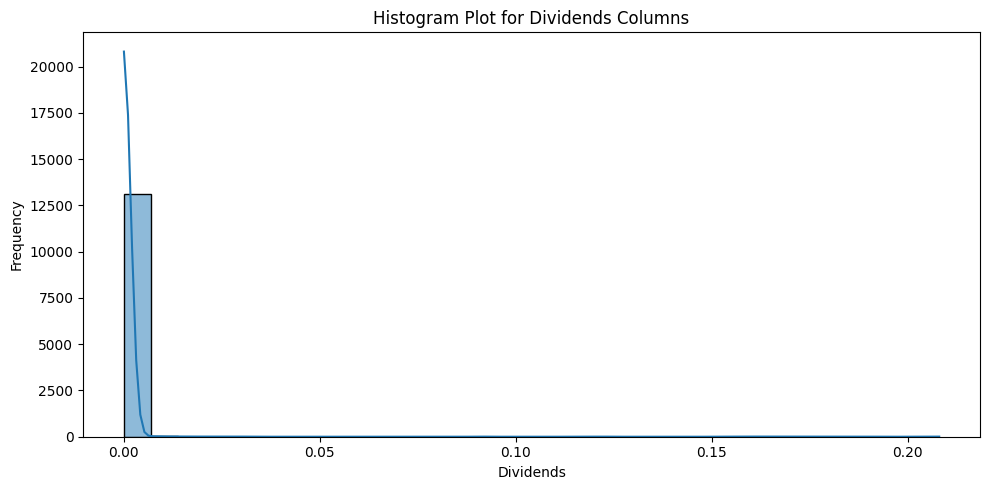

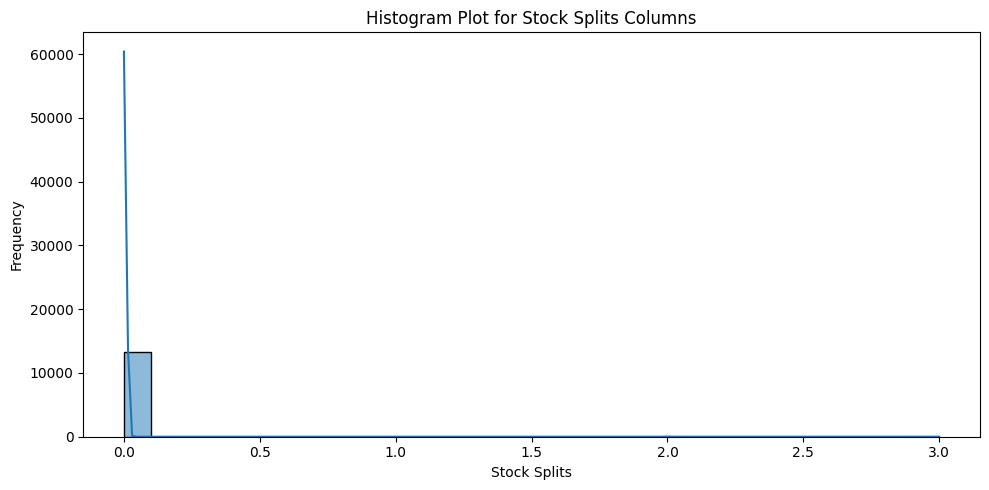

In [24]:
for col in numCol:
    plt.figure(figsize=(10,5))
    sns.histplot(numericalData[col], kde=True, bins=30)
    plt.title(f'Histogram Plot for {col} Columns')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<AxesSubplot:>

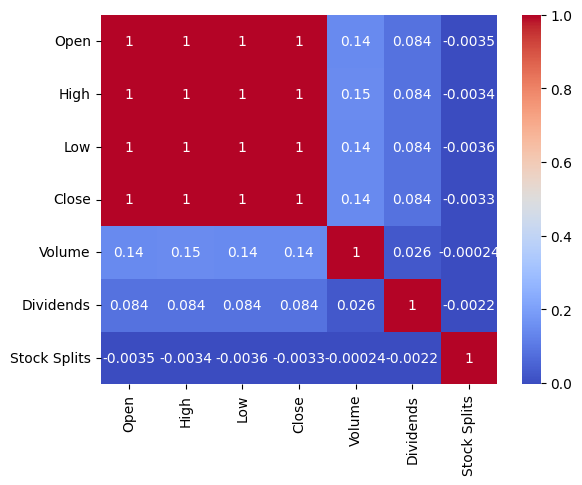

In [26]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

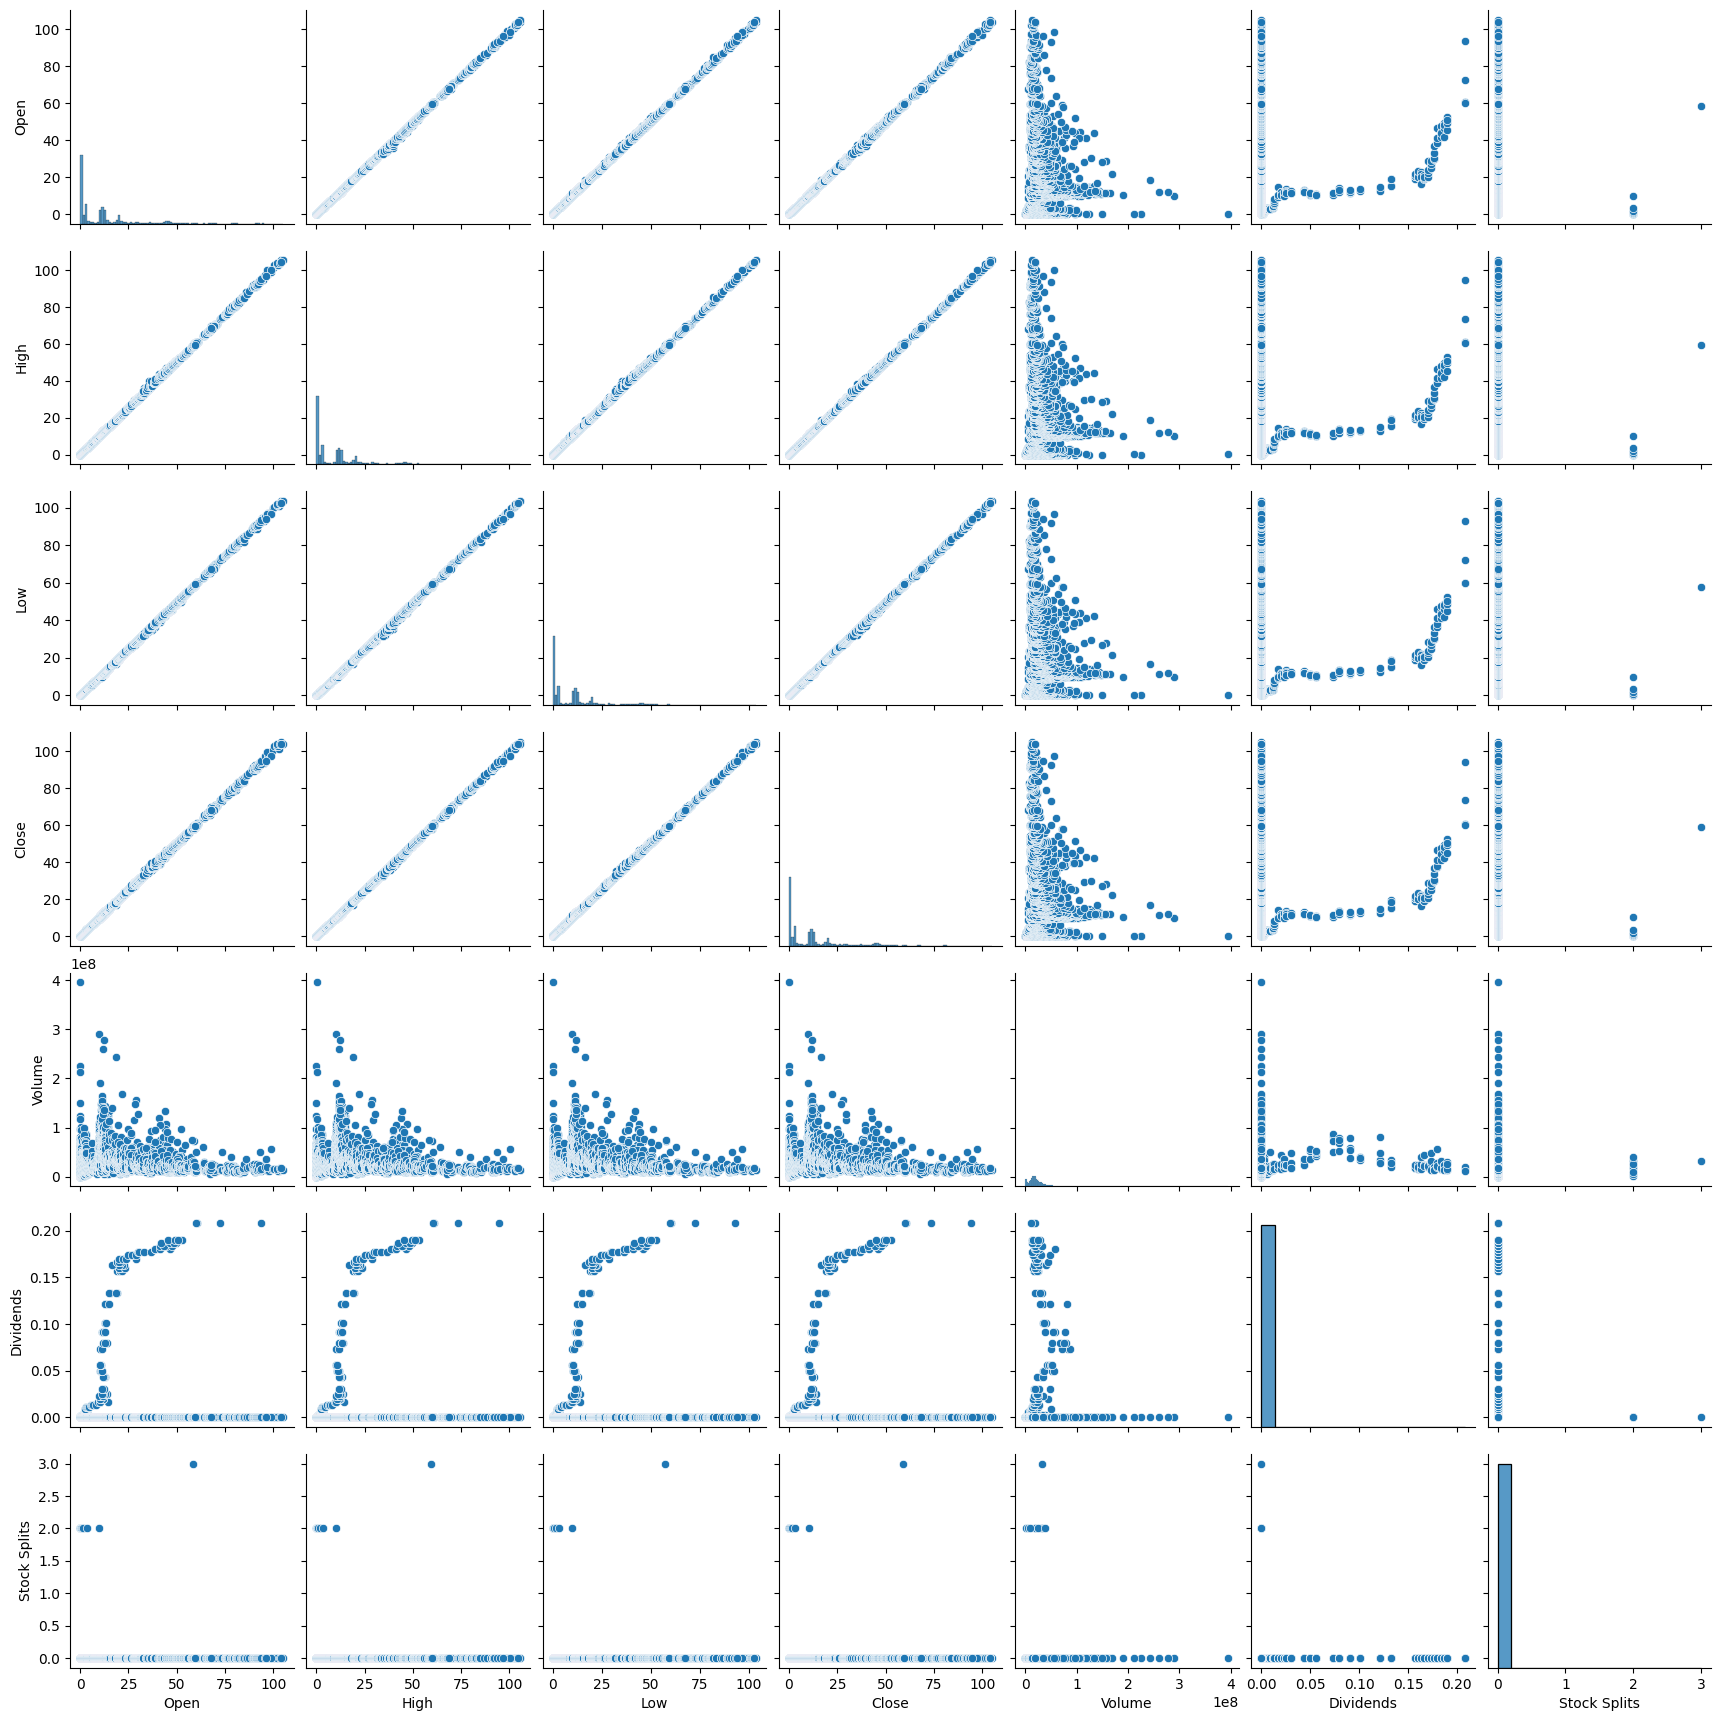

In [27]:
sns.pairplot(numericalData)


In [35]:
X = numericalData.drop(columns='Close')
y = numericalData['Close']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)
model = LinearRegression()

model.fit(X_train,y_train)

prediction = model.predict(X_test)

r2Score = r2_score(y_test, prediction)
mse = mean_squared_error(y_test, prediction)

print('R2 Score =', r2Score*100)
print('MSE Score =', mse*100)

R2 Score = 99.9965244309054
MSE Score = 0.8528854361364533


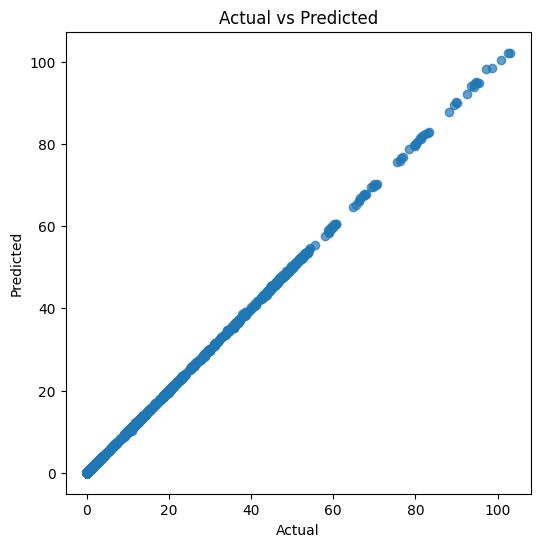

In [55]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, prediction, alpha=0.7)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()